In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [154]:
x=[]
y=[]

dicts={"normal":0,"pituitary_tumor":1}

count=0

for i in dicts:
    if i=="normal":
        path="Data_brain_tumor/Training/no_tumor"
        for j in os.listdir(path):
            count=count+1
            im=cv2.imread(path+'/'+j,0)
            im=cv2.resize(im, (200,200))
            x.append(im)
            y.append(dicts[i])
    else:
        path="Data_brain_tumor/Training/pituitary_tumor"
        for j in os.listdir(path):
            count=count+1
            im=cv2.imread(path+'/'+j,0)
            im=cv2.resize(im, (200,200))
            x.append(im)
            y.append(dicts[i])


In [155]:
y=np.array(y)
x=np.array(x)

In [156]:
x_send=x.reshape(len(x), -1)
x.shape

(1222, 200, 200)

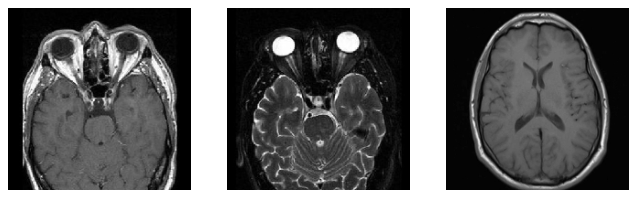

In [157]:
c=1
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

for i in x[0:3]:
    plt.subplot(1,3,c)
    plt.imshow(i,cmap='gray')
    plt.axis('off')
    c=c+1

In [158]:
from sklearn import model_selection

x_train,x_test,y_train,y_test=model_selection.train_test_split(x_send,y,train_size=0.80)

x_train = x_train/255
x_test = x_test/255

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lg = LogisticRegression(C=0.1)
lg.fit(x_train, y_train)

sv = SVC()
sv.fit(x_train, y_train)

print("logistic regression training==> ",lg.score(x_train,y_train))
print("SVM training==>",sv.score(x_train,y_train))

print("logistic regression test==> ",lg.score(x_test,y_test))
print("SVM test==>",sv.score(x_test,y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic regression training==>  1.0
SVM training==> 0.9948822927328557
logistic regression test==>  0.9469387755102041
SVM test==> 0.9510204081632653


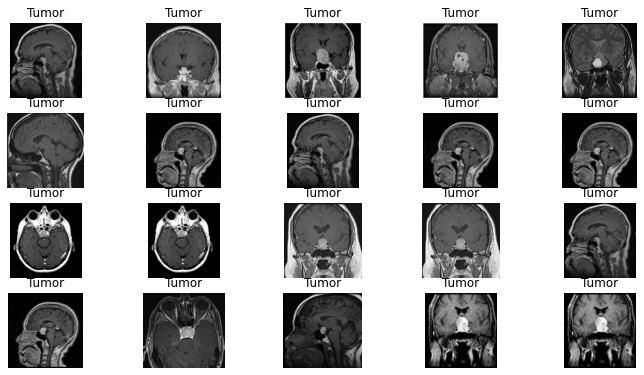

In [170]:
plt.figure(figsize=(12,8))
path = os.listdir('Data_brain_tumor/Testing/')
var=1

check = {0:'Normal', 1:'Tumor'}

for i in os.listdir('Data_brain_tumor/Testing/pituitary_tumor/')[:20]:
    plt.subplot(5,5,var)
    
    im = cv2.imread('Data_brain_tumor/Testing/pituitary_tumor/'+i,0)
    im1 = cv2.resize(img, (200,200))
    im1 = im1.reshape(1,-1)/255
    pred=sv.predict(im1)
    plt.title(check[pred[0]])
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    var=var+1

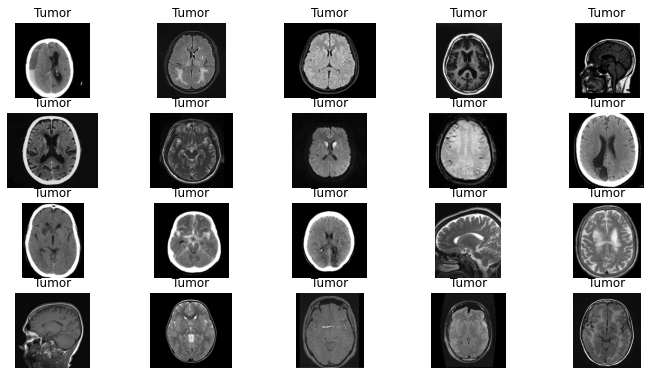

In [173]:
plt.figure(figsize=(12,8))
path = os.listdir('Data_brain_tumor/Testing/')
var=1

check = {0:'Normal', 1:'Tumor'}

for i in os.listdir('Data_brain_tumor/Testing/no_tumor/')[:20]:
    plt.subplot(5,5,var)
    
    im = cv2.imread('Data_brain_tumor/Testing/no_tumor/'+i,0)
    im1 = cv2.resize(img, (200,200))
    im1 = im1.reshape(1,-1)/255
    pred=sv.predict(im1)
    plt.title(check[pred[0]])
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    var=var+1